In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import ydata_profiling as pp

# Modele
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
   
from sklearn.linear_model import Lasso
 
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

# Optymalizacja modeli
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [2]:
valid_part = 0.3
train0 = pd.read_csv('vehicles.csv')
train0.head(50)

id                                                url  \
0   7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1   7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2   7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3   7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4   7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5   7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6   7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7   7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8   7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9   7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   
10  7218893038  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
11  7218325704  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
12  7217788283  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
13  7217147606  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
14  7209027818  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
15  7223509794  https://bellingham.craigslist.org/ctd/d/bellin...   
16  7222753076  https://bellingham.craigslist.org/ctd/d/bellin...   
17  7222206015  https://bellingham.craigslist.org/ctd/d/bellin...   
18  7220030122  https://bellingham.craigslist.org/ctd/d/bellin...   
19  7218423006  https://bellingham.craigslist.org/ctd/d/bellin...   
20  7216672204  https://bellingham.craigslist.org/ctd/d/bellin...   
21  7215617048  https://bellingham.craigslist.org/ctd/d/bellin...   
22  7213839225  https://bellingham.craigslist.org/ctd/d/bellin...   
23  7208549803  https://bellingham.craigslist.org/ctd/d/bellin...   
24  7213843538  https://skagit.craigslist.org/ctd/d/bellingham...   
25  7212631321  https://skagit.craigslist.org/ctd/d/bellingham...   
26  7219973522  https://lacrosse.craigslist.org/cto/d/la-cross...   
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...   
32  7316343444  https://auburn.craigslist.org/ctd/d/auburn-uni...   
33  7316304717  https://auburn.craigslist.org/ctd/d/auburn-uni...   
34  7316285779  https://auburn.craigslist.org/cto/d/auburn-201...   
35  7316257769  https://auburn.craigslist.org/ctd/d/auburn-uni...   
36  7316133914  https://auburn.craigslist.org/ctd/d/auburn-uni...   
37  7316130053  https://auburn.craigslist.org/cto/d/opelika-19...   
38  7315816316  https://auburn.craigslist.org/ctd/d/auburn-uni...   
39  7315770394  https://auburn.craigslist.org/ctd/d/auburn-uni...   
40  7315756348  https://auburn.craigslist.org/ctd/d/auburn-uni...   
41  7315715960  https://auburn.craigslist.org/ctd/d/auburn-uni...   
42  7315379459  https://auburn.craigslist.org/ctd/d/auburn-uni...   
43  7315275975  https://auburn.craigslist.org/ctd/d/auburn-uni...   
44  7315275942  https://auburn.craigslist.org/ctd/d/auburn-uni...   
45  7315270785  https://auburn.craigslist.org/ctd/d/auburn-uni...   
46  7315039307  https://auburn.craigslist.org/ctd/d/auburn-999...   
47  7314910156  https://auburn.craigslist.org/ctd/d/auburn-uni...   
48  7314854462  https://auburn.craigslist.org/ctd/d/auburn-uni...   
49  7314811916  https://auburn.craigslist.org/ctd/d/auburn-uni...   

                    region                           region_url  price  \
0                 prescott      https://prescott.craigslist.org   6000   
1             fayetteville         https://fayar.craigslist.org  11900   
2             florida keys          https://keys.craigslist.org  21000   
3   worcester / central MA     https://worcester.craigslist.org   1500   
4               greensboro    https://greensboro.craigslist.org   4900   
5            hudson valley  https://hudsonvalley

In [3]:
drop_columns = ['url', 'region_url', 'region', 'manufacturer', 'model', 'lat', 'long', 'posting_date', 'state', 'county', 'size', 'description', 'title_status', 'VIN', 'image_url']
train0 = train0.drop(columns = drop_columns)
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 35.8+ MB


In [4]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 35.8+ MB


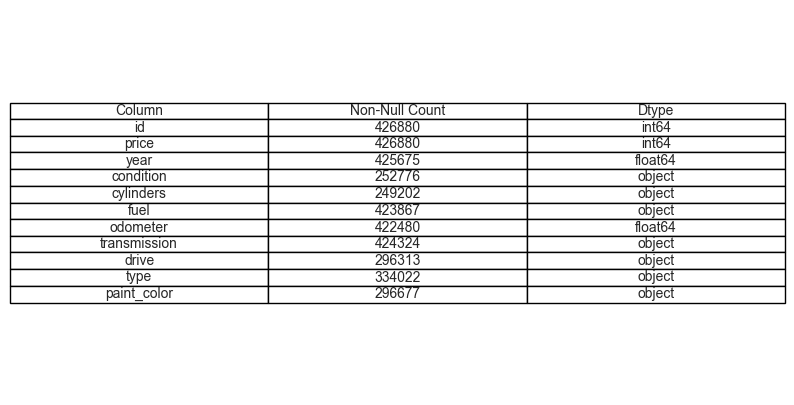

In [5]:
# Create a DataFrame summarizing df.info()
info_df = pd.DataFrame({
    "Column": train0.columns,
    "Non-Null Count": train0.notnull().sum(),
    "Dtype": train0.dtypes
}).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(10, 5))  # Set appropriate size based on your DataFrame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=info_df.values, colLabels=info_df.columns, cellLoc = 'center', loc='center')

plt.show()

In [6]:
train0 = train0.dropna()
train0.head(5)
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122262 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            122262 non-null  int64  
 1   price         122262 non-null  int64  
 2   year          122262 non-null  float64
 3   condition     122262 non-null  object 
 4   cylinders     122262 non-null  object 
 5   fuel          122262 non-null  object 
 6   odometer      122262 non-null  float64
 7   transmission  122262 non-null  object 
 8   drive         122262 non-null  object 
 9   type          122262 non-null  object 
 10  paint_color   122262 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.2+ MB


In [7]:
train0['drive'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [8]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)

for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [9]:
train0['drive'].unique()
train0.head(10)
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122262 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            122262 non-null  int64  
 1   price         122262 non-null  int64  
 2   year          122262 non-null  float64
 3   condition     122262 non-null  int32  
 4   cylinders     122262 non-null  int32  
 5   fuel          122262 non-null  int32  
 6   odometer      122262 non-null  float64
 7   transmission  122262 non-null  int32  
 8   drive         122262 non-null  int32  
 9   type          122262 non-null  int32  
 10  paint_color   122262 non-null  int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 7.9 MB


In [10]:
train0['year'] = (train0['year']-1900).astype(int)
train0['odometer'] = train0['odometer'].astype(int)
train0.head(10)

id  price  year  condition  cylinders  fuel  odometer  \
31  7316356412  15000   113          0          5     2    128000   
32  7316343444  27990   112          2          6     2     68696   
33  7316304717  34590   116          2          5     2     29499   
34  7316285779  35000   119          0          5     2     43000   
35  7316257769  29990   116          2          5     2     17302   
36  7316133914  38590   111          2          6     2     30237   
38  7315816316  32990   117          2          5     2     30041   
42  7315379459  37990   116          2          6     2      9704   
45  7315270785  27990   118          2          5     2     37332   
55  7314560853  19900   104          2          6     0     88000   

    transmission  drive  type  paint_color  
31             0      2    10            0  
32             2      0     8            0  
33             2      0     8            9  
34             0      0    10            5  
35             2      0     8            8  
36             2      2     7            8  
38             2      0     7            9  
42             2      2     3            8  
45             2      0     8            9  
55             0      0     8            1

In [11]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122262 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            122262 non-null  int64
 1   price         122262 non-null  int64
 2   year          122262 non-null  int32
 3   condition     122262 non-null  int32
 4   cylinders     122262 non-null  int32
 5   fuel          122262 non-null  int32
 6   odometer      122262 non-null  int32
 7   transmission  122262 non-null  int32
 8   drive         122262 non-null  int32
 9   type          122262 non-null  int32
 10  paint_color   122262 non-null  int32
dtypes: int32(9), int64(2)
memory usage: 7.0 MB


In [12]:
train0['price'].value_counts()

price
0        4484
4500     1291
3500     1283
6500     1271
5500     1200
         ... 
13199       1
3315        1
4515        1
8099        1
4191        1
Name: count, Length: 5343, dtype: int64

In [13]:
train0 = train0[train0['price'] > 1000]
train0 = train0[train0['price'] < 40000]
train0['odometer'] = train0['odometer'] // 5000
train0 = train0[train0['year'] > 110]

In [14]:
train0.corr()

id     price      year  condition  cylinders      fuel  \
id            1.000000 -0.008911 -0.047531   0.012857  -0.004055  0.023532   
price        -0.008911  1.000000  0.536605   0.214614   0.549304 -0.041964   
year         -0.047531  0.536605  1.000000   0.192908   0.021209  0.102496   
condition     0.012857  0.214614  0.192908   1.000000   0.126319  0.058777   
cylinders    -0.004055  0.549304  0.021209   0.126319   1.000000 -0.034469   
fuel          0.023532 -0.041964  0.102496   0.058777  -0.034469  1.000000   
odometer     -0.004747 -0.446274 -0.521904  -0.169597  -0.023316 -0.185958   
transmission  0.049568  0.511823  0.318319   0.293445   0.298294  0.143792   
drive        -0.007477 -0.070350  0.023638   0.064842  -0.032557 -0.011371   
type          0.032311  0.038705 -0.007015   0.054350   0.061117 -0.071465   
paint_color   0.011874  0.048631  0.005944   0.007915   0.026477 -0.074729   

              odometer  transmission     drive      type  paint_color  
id           -0.004747      0.049568 -0.007477  0.032311     0.011874  
price        -0.446274      0.511823 -0.070350  0.038705     0.048631  
year         -0.521904      0.318319  0.023638 -0.007015     0.005944  
condition    -0.169597      0.293445  0.064842  0.054350     0.007915  
cylinders    -0.023316      0.298294 -0.032557  0.061117     0.026477  
fuel         -0.185958      0.143792 -0.011371 -0.071465    -0.074729  
odometer      1.000000     -0.379447 -0.065719  0.037109     0.031238  
transmission -0.379447      1.000000  0.046243  0.004462    -0.029526  
drive        -0.065719      0.046243  1.000000  0.150071     0.089689  
type          0.037109      0.004462  0.150071  1.000000     0.084703  
paint_color   0.031238     -0.029526  0.089689  0.084703     1.000000

In [15]:
train0.describe()

id         price          year     condition     cylinders  \
count  5.792200e+04  57922.000000  57922.000000  57922.000000  57922.000000   
mean   7.311648e+09  19734.851939    114.744311      1.210749      4.446117   
std    4.259617e+06  10460.774647      2.558382      1.175934      1.250765   
min    7.301588e+09   1012.000000    111.000000      0.000000      0.000000   
25%    7.308511e+09  10800.000000    113.000000      0.000000      3.000000   
50%    7.312786e+09  17600.000000    115.000000      2.000000      5.000000   
75%    7.315249e+09  28590.000000    117.000000      2.000000      5.000000   
max    7.317097e+09  39999.000000    122.000000      5.000000      7.000000   

               fuel      odometer  transmission         drive          type  \
count  57922.000000  57922.000000  57922.000000  57922.000000  57922.000000   
mean       1.985826     16.355685      0.388177      0.763389      6.116018   
std        0.504077     12.141385      0.767629      0.756780      4.040066   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      7.000000      0.000000      0.000000      2.000000   
50%        2.000000     16.000000      0.000000      1.000000      8.000000   
75%        2.000000     23.000000      0.000000      1.000000      9.000000   
max        4.000000    469.000000      2.000000      2.000000     12.000000   

        paint_color  
count  57922.000000  
mean       5.678499  
std        4.096973  
min        0.000000  
25%        1.000000  
50%        8.000000  
75%       10.000000  
max       11.000000

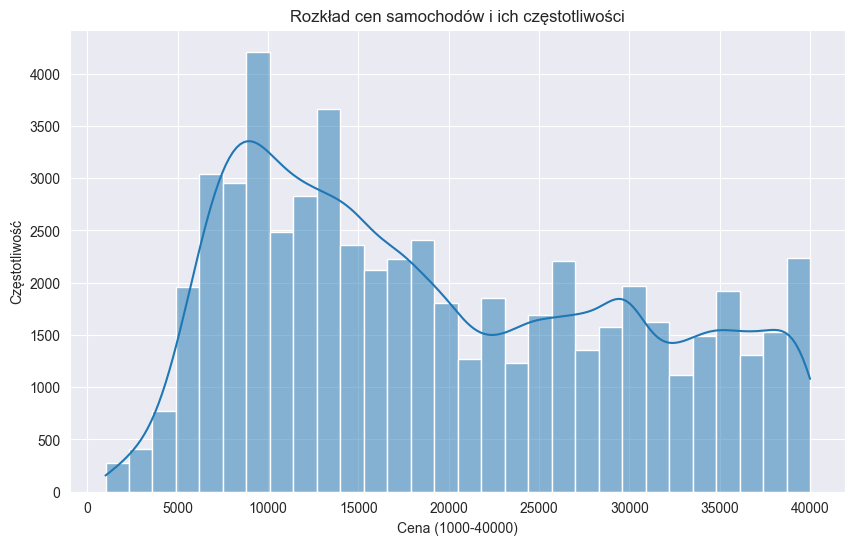

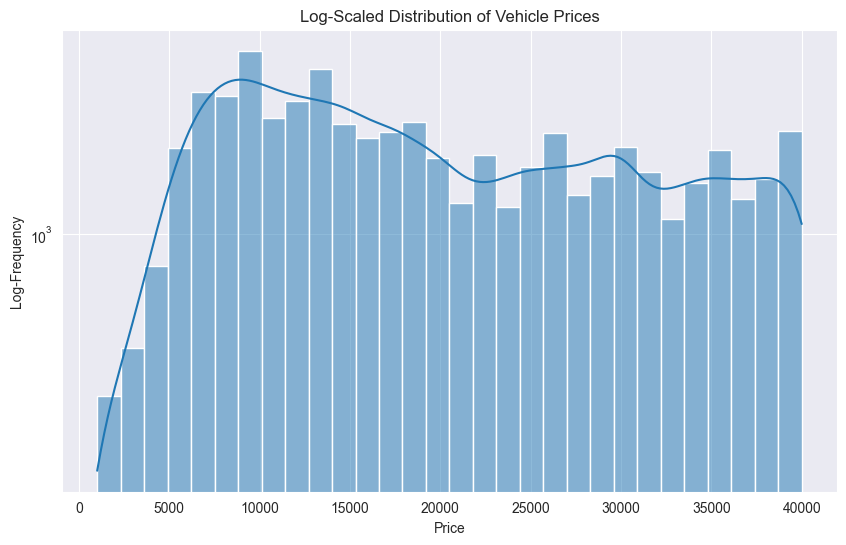

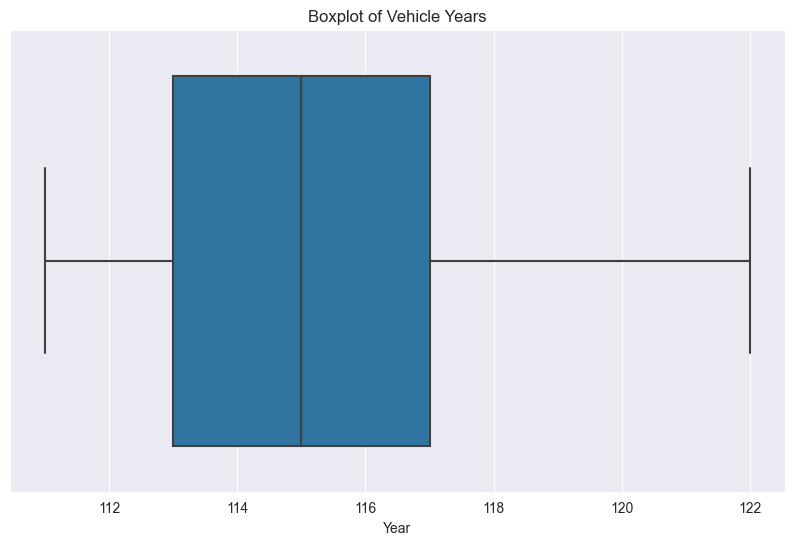

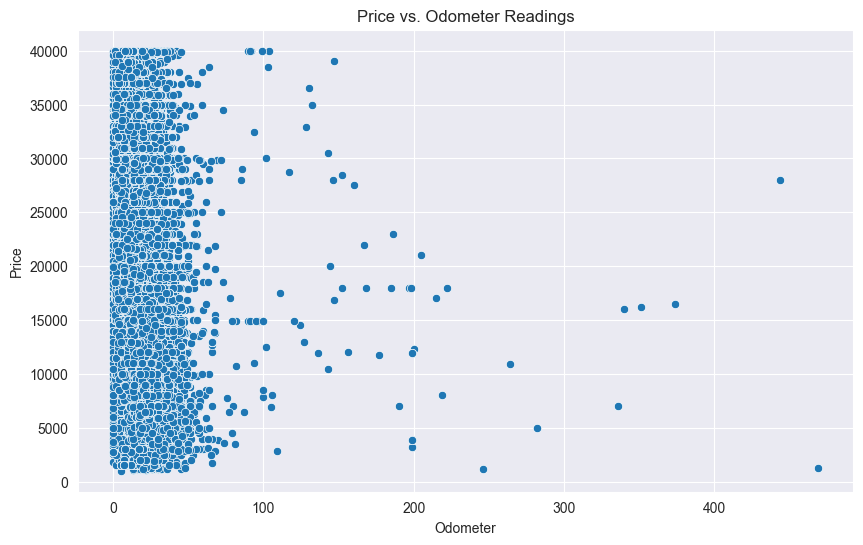

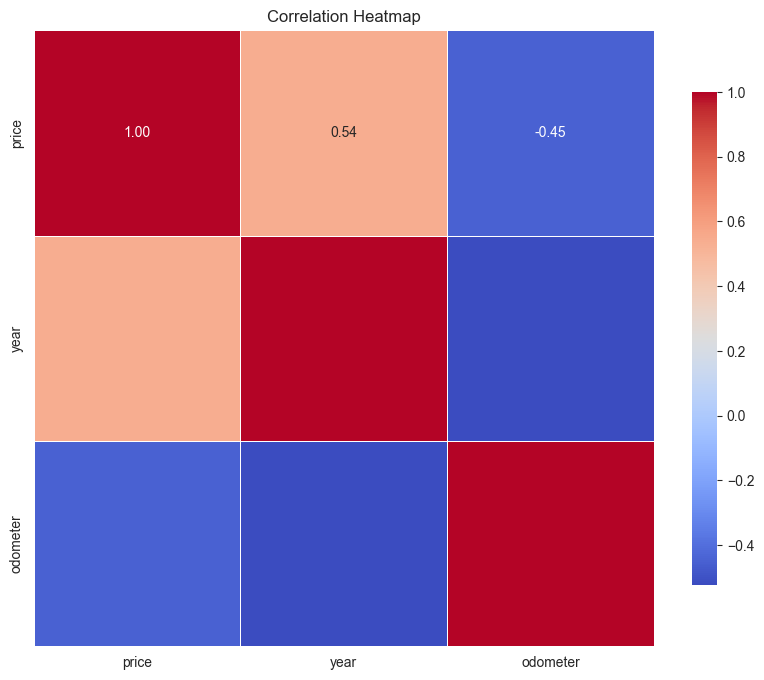

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train0['price'], bins=30, kde=True)
plt.title('Rozkład cen samochodów i ich częstotliwości')
plt.xlabel('Cena (1000-40000)')
plt.ylabel('Częstotliwość')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train0['price'], bins=30, kde=True, log_scale=(False, True))  # False for x-axis, True for y-axis
plt.title('Log-Scaled Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Log-Frequency')
plt.show()


# Boxplot of vehicle year
plt.figure(figsize=(10, 6))
sns.boxplot(x=train0['year'])
plt.title('Boxplot of Vehicle Years')
plt.xlabel('Year')
plt.show()

# Scatter plot of price vs odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=train0)
plt.title('Price vs. Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train0[['price', 'year', 'odometer']].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [17]:
pp.ProfileReport(train0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [19]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=42)

In [20]:
train0b = train0
train_target0b = train_target0
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=42)

In [21]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [22]:
train0.head(3)

id      year  condition  cylinders      fuel  odometer  transmission  \
0  0.587878 -1.071381  -1.030525  -1.152358  0.029158  0.051866     -0.504307   
1 -0.581887 -0.289841   1.519347   0.445655  0.029158 -0.273666     -0.504307   
2  0.294359 -0.680611  -1.030525  -1.152358  0.029158  0.784313     -0.504307   

      drive      type  paint_color  
0  0.313816  0.713297     1.055441  
1  0.313816 -0.276604    -0.898024  
2  0.313816  0.713297    -1.386390

In [23]:
len(train0)

46337

In [24]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=42)

In [25]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [26]:
def acc_d(y_meas, y_pred):
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    return (mean_squared_error(y_meas, y_pred))**0.5

In [27]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) dla train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) dla train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) dla train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) dla test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) dla test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) dla test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [28]:
def acc_model(num,model,train,test):

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) dla train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) dla train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) dla train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) dla test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) dla test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) dla test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

## MODELE

In [29]:
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27984.22018217 17156.23890252 20746.7574001  19374.48565688
 10151.89279292]
acc(r2_score) dla train = 66.79
acc(relative error) dla train = 22.71
acc(rmse) dla train = 600523.64
target_test = [19900 14998  8500 16900 17990]
ytest = [16377.99571492 18406.88716332 14934.96323694 18448.37493146
 22562.48949975]
acc(r2_score) dla test = 64.37
acc(relative error) dla test = 23.12
acc(rmse) dla test = 627059.68


In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(train, target)
acc_model(1,lasso,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27984.01205101 17156.09036875 20746.49528356 19374.37629762
 10151.92474251]
acc(r2_score) dla train = 66.79
acc(relative error) dla train = 22.71
acc(rmse) dla train = 600523.64
target_test = [19900 14998  8500 16900 17990]
ytest = [16377.85025699 18407.36953428 14935.19198357 18448.73619261
 22562.39592382]
acc(r2_score) dla test = 64.37
acc(relative error) dla test = 23.12
acc(rmse) dla test = 627058.45


In [31]:
svr = SVR()
svr.fit(train, target)
acc_model(2,svr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [19707.66824887 17496.6207411  18438.91092248 17380.19350821
 15217.15965072]
acc(r2_score) dla train = 18.0
acc(relative error) dla train = 39.71
acc(rmse) dla train = 943689.42
target_test = [19900 14998  8500 16900 17990]
ytest = [17483.89960087 17883.83473415 16630.39022926 17704.05411845
 17970.26890632]
acc(r2_score) dla test = 17.79
acc(relative error) dla test = 40.12
acc(rmse) dla test = 952464.01


In [32]:
linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(3,linear_svr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [22914.74048375 13904.66968096 17321.91831325 15032.87996323
  7889.99072741]
acc(r2_score) dla train = 48.27
acc(relative error) dla train = 27.93
acc(rmse) dla train = 749536.59
target_test = [19900 14998  8500 16900 17990]
ytest = [13388.26341156 13769.96888659 12516.96356803 14745.55527412
 17560.04961518]
acc(r2_score) dla test = 45.24
acc(relative error) dla test = 28.4
acc(rmse) dla test = 777365.32


In [33]:
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
mlp_GS.fit(train, target)
acc_model(4,mlp_GS,train,test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
target =  [20990 14000 20000 10995 12990]
ytrain =  [30147.46560399 15069.57358996 18865.29185067 16835.69149049
  8000.53155603]
acc(r2_score) dla train = 78.0
acc(relative error) dla train = 18.31
acc(rmse) dla train = 488787.42
target_test = [19900 14998  8500 16900 17990]
ytest = [18031.50097163 18012.45017214 13285.6264257  14278.009687
 21511.74923496]
acc(r2_score) dla test = 78.28
acc(relative error) dla test = 18.28
acc(rmse) dla test = 489577.59


In [34]:
sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(5,sgd,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28168.87471948 17800.5132201  20928.17702864 19901.17125831
 10175.23547134]
acc(r2_score) dla train = 66.72
acc(relative error) dla train = 22.76
acc(rmse) dla train = 601150.46
target_test = [19900 14998  8500 16900 17990]
ytest = [16490.00658565 18013.45340779 14705.58805233 18729.51843884
 23023.08527934]
acc(r2_score) dla test = 64.18
acc(relative error) dla test = 23.21
acc(rmse) dla test = 628750.82


In [35]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(6,decision_tree,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [20990. 14000. 20000. 10995. 12990.]
acc(r2_score) dla train = 100.0
acc(relative error) dla train = 0.0
acc(rmse) dla train = 0.0
target_test = [19900 14998  8500 16900 17990]
ytest = [19900. 14998.  7999. 16900. 17990.]
acc(r2_score) dla test = 76.81
acc(relative error) dla test = 14.66
acc(rmse) dla test = 505849.73


In [36]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(7,random_forest,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [21169.1  15273.67 18768.96 12983.55 12231.34]
acc(r2_score) dla train = 98.15
acc(relative error) dla train = 4.39
acc(rmse) dla train = 141553.35
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.   15266.72 12079.77 15942.81 17410.13]
acc(r2_score) dla test = 87.51
acc(relative error) dla test = 11.6
acc(rmse) dla test = 371321.1


In [37]:
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror')
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(8,xgb_reg,trainb,testb)

Best score: 0.853
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}
target =  [20990 14000 20000 10995 12990]
ytrain =  [23289.049 12492.404 17964.156 15016.857  8752.747]
acc(r2_score) dla train = 88.85
acc(relative error) dla train = 12.61
acc(rmse) dla train = 348058.52
target_test = [19900 14998  8500 16900 17990]
ytest = [18932.805 18905.898 13078.086 15419.592 19841.42 ]
acc(r2_score) dla test = 86.21
acc(relative error) dla test = 13.96
acc(rmse) dla test = 390154.73


In [38]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=42)
train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

In [39]:
# params = {
#         'boosting_type':'gbdt',
#         'objective': 'regression',
#         'num_leaves': 31,
#         'learning_rate': 0.01,
#         'max_depth': -1,
#         'subsample': 0.8,
#         'bagging_fraction' : 1,
#         'max_bin' : 5000 ,
#         'bagging_freq': 20,
#         'colsample_bytree': 0.6,
#         'metric': 'rmse',
#         'min_split_gain': 0.5,
#         'min_child_weight': 1,
#         'min_child_samples': 10,
#         'scale_pos_weight':1,
#         'zero_as_missing': False,
#         'seed':0,        
#     }
# modelL = lgb.train(params, train_set = train_set, num_boost_round=10000, valid_sets=valid_set)

In [40]:
# acc_boosting_model(9,modelL,trainb,testb,modelL.best_iteration)

In [41]:
# fig =  plt.figure(figsize = (5,5))
# axes = fig.add_subplot(111)
# lgb.plot_importance(modelL,ax = axes,height = 0.5)
# plt.show()
# plt.close()

In [42]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.810772714707056                                                                                                      
{'max_depth': 2, 'n_estimators': 510}                                                                                  
0.8615186207781447                                                                                                     
{'max_depth': 7, 'n_estimators': 681}                                                                                  
0.8509692610691413                                                                                                     
{'max_depth': 5, 'n_estimators': 628}                                                                                  
0.8596639886374391                                                                                                     
{'max_depth': 8, 'n_estimators': 156}                                                                                  
0.803134072664316                       

In [43]:
params = space_eval(space_gb, best)
params

{'max_depth': 2, 'n_estimators': 256}

In [44]:
gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(10,gradient_boosting,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27168.86863596 13947.61945705 14548.200591   15942.98902485
  8499.95141674]
acc(r2_score) dla train = 80.56
acc(relative error) dla train = 17.33
acc(rmse) dla train = 459481.97
target_test = [19900 14998  8500 16900 17990]
ytest = [18019.541006   21179.09810685 13836.26164305 14915.60345489
 21586.34984073]
acc(r2_score) dla test = 81.07
acc(relative error) dla test = 17.22
acc(rmse) dla test = 457067.33


In [45]:
ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(11,ridge,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27983.67664858 17156.97774459 20747.40691051 19374.1672534
 10154.00725405]
acc(r2_score) dla train = 66.79
acc(relative error) dla train = 22.71
acc(rmse) dla train = 600523.68
target_test = [19900 14998  8500 16900 17990]
ytest = [16379.37063825 18406.96994099 14936.06552334 18448.66263552
 22561.29937787]
acc(r2_score) dla test = 64.37
acc(relative error) dla test = 23.12
acc(rmse) dla test = 627055.03


In [46]:
bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(12,bagging,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [21290.  14740.  17798.5 11295.  11967. ]
acc(r2_score) dla train = 97.44
acc(relative error) dla train = 4.89
acc(rmse) dla train = 166830.88
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.  14998.  11616.5 15669.  21218.5]
acc(r2_score) dla test = 86.45
acc(relative error) dla test = 12.16
acc(rmse) dla test = 386651.69


In [47]:
etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(13,etr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [20990. 14000. 20000. 10995. 12990.]
acc(r2_score) dla train = 100.0
acc(relative error) dla train = 0.0
acc(rmse) dla train = 448.6
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.   14998.   13958.19 16900.   17990.  ]
acc(r2_score) dla test = 87.22
acc(relative error) dla test = 10.82
acc(rmse) dla test = 375587.28


In [48]:
Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(14,Ada_Boost,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27191.67959119 17680.12738647 17113.44784525 18239.62709478
 12539.56059598]
acc(r2_score) dla train = 63.8
acc(relative error) dla train = 26.31
acc(rmse) dla train = 627055.8
target_test = [19900 14998  8500 16900 17990]
ytest = [21671.47949072 21383.30210407 17915.93219557 17680.12738647
 21383.30210407]
acc(r2_score) dla test = 63.93
acc(relative error) dla test = 26.42
acc(rmse) dla test = 630865.74


In [49]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(15,Voting_Reg,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27878.15022389 17258.19334262 20791.65611724 19441.10905699
 10139.42201202]
acc(r2_score) dla train = 66.79
acc(relative error) dla train = 22.71
acc(rmse) dla train = 600580.17
target_test = [19900 14998  8500 16900 17990]
ytest = [16473.59375741 18403.72909102 14992.33437978 18569.95531116
 22640.65103422]
acc(r2_score) dla test = 64.34
acc(relative error) dla test = 23.13
acc(rmse) dla test = 627319.03


In [50]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(train, target)
acc_model(16,elastic,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [27887.10816902 17270.41372379 20840.17061579 19328.39677008
 10479.76357705]
acc(r2_score) dla train = 66.7
acc(relative error) dla train = 22.82
acc(rmse) dla train = 601340.86
target_test = [19900 14998  8500 16900 17990]
ytest = [16585.31802512 18425.20881921 15105.88527186 18496.64343192
 22383.19591767]
acc(r2_score) dla test = 64.36
acc(relative error) dla test = 23.24
acc(rmse) dla test = 627104.7


## POROWNANIE

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Support Vector Machines', 'Linear SVR', 
              'MLPRegressor', 'Stochastic Gradient Decent', 
              'Decision Tree Regressor', 'Random Forest',  'XGB',
              'GradientBoostingRegressor', 'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 
              'AdaBoostRegressor', 'VotingRegressor', 'ElasticNet'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [53]:
pd.options.display.float_format = '{:,.2f}'.format

In [54]:
print('Dokladnosc przewidywania R2 - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Dokladnosc przewidywania R2 - r2_test


Model  r2_train  r2_test  d_train  d_test  \
7                Random Forest     98.15    87.51     4.39   11.60   
12         ExtraTreesRegressor    100.00    87.22     0.00   10.82   
11            BaggingRegressor     97.44    86.45     4.89   12.16   
8                          XGB     88.85    86.21    12.61   13.96   
9    GradientBoostingRegressor     80.56    81.07    17.33   17.22   
4                 MLPRegressor     78.00    78.28    18.31   18.28   
6      Decision Tree Regressor    100.00    76.81     0.00   14.66   
0            Linear Regression     66.79    64.37    22.71   23.12   
1                        Lasso     66.79    64.37    22.71   23.12   
10              RidgeRegressor     66.79    64.37    22.71   23.12   
15                  ElasticNet     66.70    64.36    22.82   23.24   
14             VotingRegressor     66.79    64.34    22.71   23.13   
5   Stochastic Gradient Decent     66.72    64.18    22.76   23.21   
13           AdaBoostRegressor     63.80    63.93    26.31   26.42   
3                   Linear SVR     48.27    45.24    27.93   28.40   
2      Support Vector Machines     18.00    17.79    39.71   40.12   

    rmse_train  rmse_test  
7   141,553.35 371,321.10  
12      448.60 375,587.28  
11  166,830.88 386,651.69  
8   348,058.52 390,154.73  
9   459,481.97 457,067.33  
4   488,787.42 489,577.59  
6         0.00 505,849.73  
0   600,523.64 627,059.68  
1   600,523.64 627,058.45  
10  600,523.68 627,055.03  
15  601,340.86 627,104.70  
14  600,580.17 627,319.03  
5   601,150.46 628,750.82  
13  627,055.80 630,865.74  
3   749,536.59 777,365.32  
2   943,689.42 952,464.01

In [55]:
print('Dokladnosc przewidywania relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Dokladnosc przewidywania relative error - d_test


Model  r2_train  r2_test  d_train  d_test  \
12         ExtraTreesRegressor    100.00    87.22     0.00   10.82   
7                Random Forest     98.15    87.51     4.39   11.60   
11            BaggingRegressor     97.44    86.45     4.89   12.16   
8                          XGB     88.85    86.21    12.61   13.96   
6      Decision Tree Regressor    100.00    76.81     0.00   14.66   
9    GradientBoostingRegressor     80.56    81.07    17.33   17.22   
4                 MLPRegressor     78.00    78.28    18.31   18.28   
0            Linear Regression     66.79    64.37    22.71   23.12   
1                        Lasso     66.79    64.37    22.71   23.12   
10              RidgeRegressor     66.79    64.37    22.71   23.12   
14             VotingRegressor     66.79    64.34    22.71   23.13   
5   Stochastic Gradient Decent     66.72    64.18    22.76   23.21   
15                  ElasticNet     66.70    64.36    22.82   23.24   
13           AdaBoostRegressor     63.80    63.93    26.31   26.42   
3                   Linear SVR     48.27    45.24    27.93   28.40   
2      Support Vector Machines     18.00    17.79    39.71   40.12   

    rmse_train  rmse_test  
12      448.60 375,587.28  
7   141,553.35 371,321.10  
11  166,830.88 386,651.69  
8   348,058.52 390,154.73  
6         0.00 505,849.73  
9   459,481.97 457,067.33  
4   488,787.42 489,577.59  
0   600,523.64 627,059.68  
1   600,523.64 627,058.45  
10  600,523.68 627,055.03  
14  600,580.17 627,319.03  
5   601,150.46 628,750.82  
15  601,340.86 627,104.70  
13  627,055.80 630,865.74  
3   749,536.59 777,365.32  
2   943,689.42 952,464.01

In [56]:
print('Dokladnosc przewidowyania RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Dokladnosc przewidowyania RMSE - rmse_test


Model  r2_train  r2_test  d_train  d_test  \
7                Random Forest     98.15    87.51     4.39   11.60   
12         ExtraTreesRegressor    100.00    87.22     0.00   10.82   
11            BaggingRegressor     97.44    86.45     4.89   12.16   
8                          XGB     88.85    86.21    12.61   13.96   
9    GradientBoostingRegressor     80.56    81.07    17.33   17.22   
4                 MLPRegressor     78.00    78.28    18.31   18.28   
6      Decision Tree Regressor    100.00    76.81     0.00   14.66   
10              RidgeRegressor     66.79    64.37    22.71   23.12   
1                        Lasso     66.79    64.37    22.71   23.12   
0            Linear Regression     66.79    64.37    22.71   23.12   
15                  ElasticNet     66.70    64.36    22.82   23.24   
14             VotingRegressor     66.79    64.34    22.71   23.13   
5   Stochastic Gradient Decent     66.72    64.18    22.76   23.21   
13           AdaBoostRegressor     63.80    63.93    26.31   26.42   
3                   Linear SVR     48.27    45.24    27.93   28.40   
2      Support Vector Machines     18.00    17.79    39.71   40.12   

    rmse_train  rmse_test  
7   141,553.35 371,321.10  
12      448.60 375,587.28  
11  166,830.88 386,651.69  
8   348,058.52 390,154.73  
9   459,481.97 457,067.33  
4   488,787.42 489,577.59  
6         0.00 505,849.73  
10  600,523.68 627,055.03  
1   600,523.64 627,058.45  
0   600,523.64 627,059.68  
15  601,340.86 627,104.70  
14  600,580.17 627,319.03  
5   601,150.46 628,750.82  
13  627,055.80 630,865.74  
3   749,536.59 777,365.32  
2   943,689.42 952,464.01

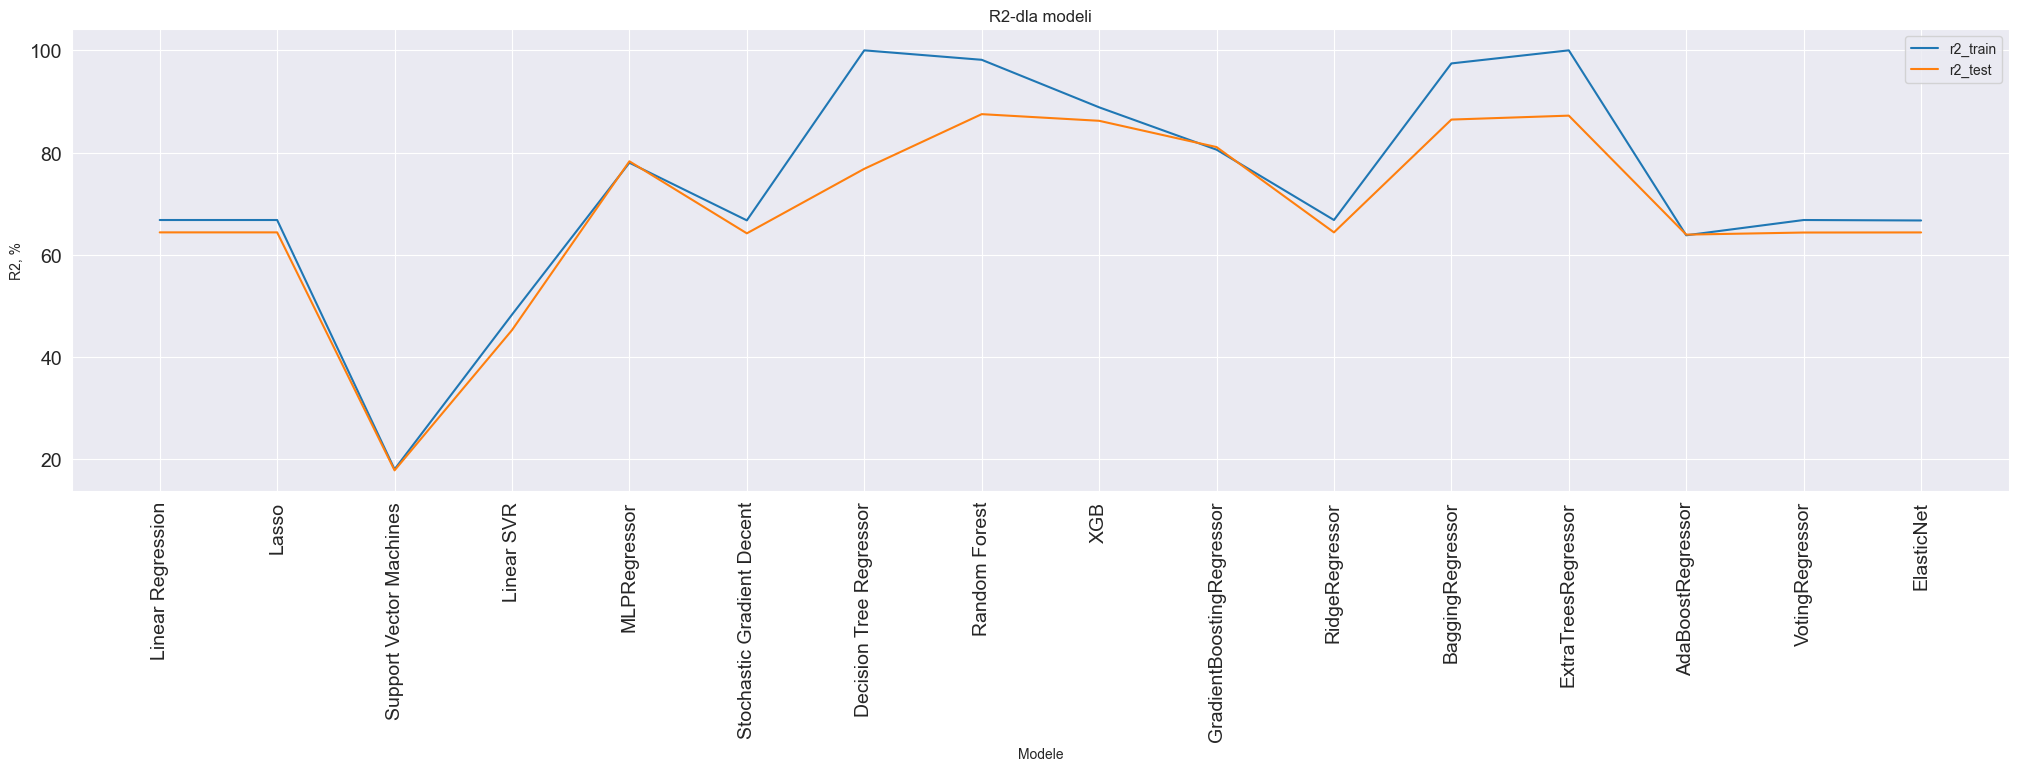

In [57]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-dla modeli')
plt.xlabel('Modele')
plt.ylabel('R2, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

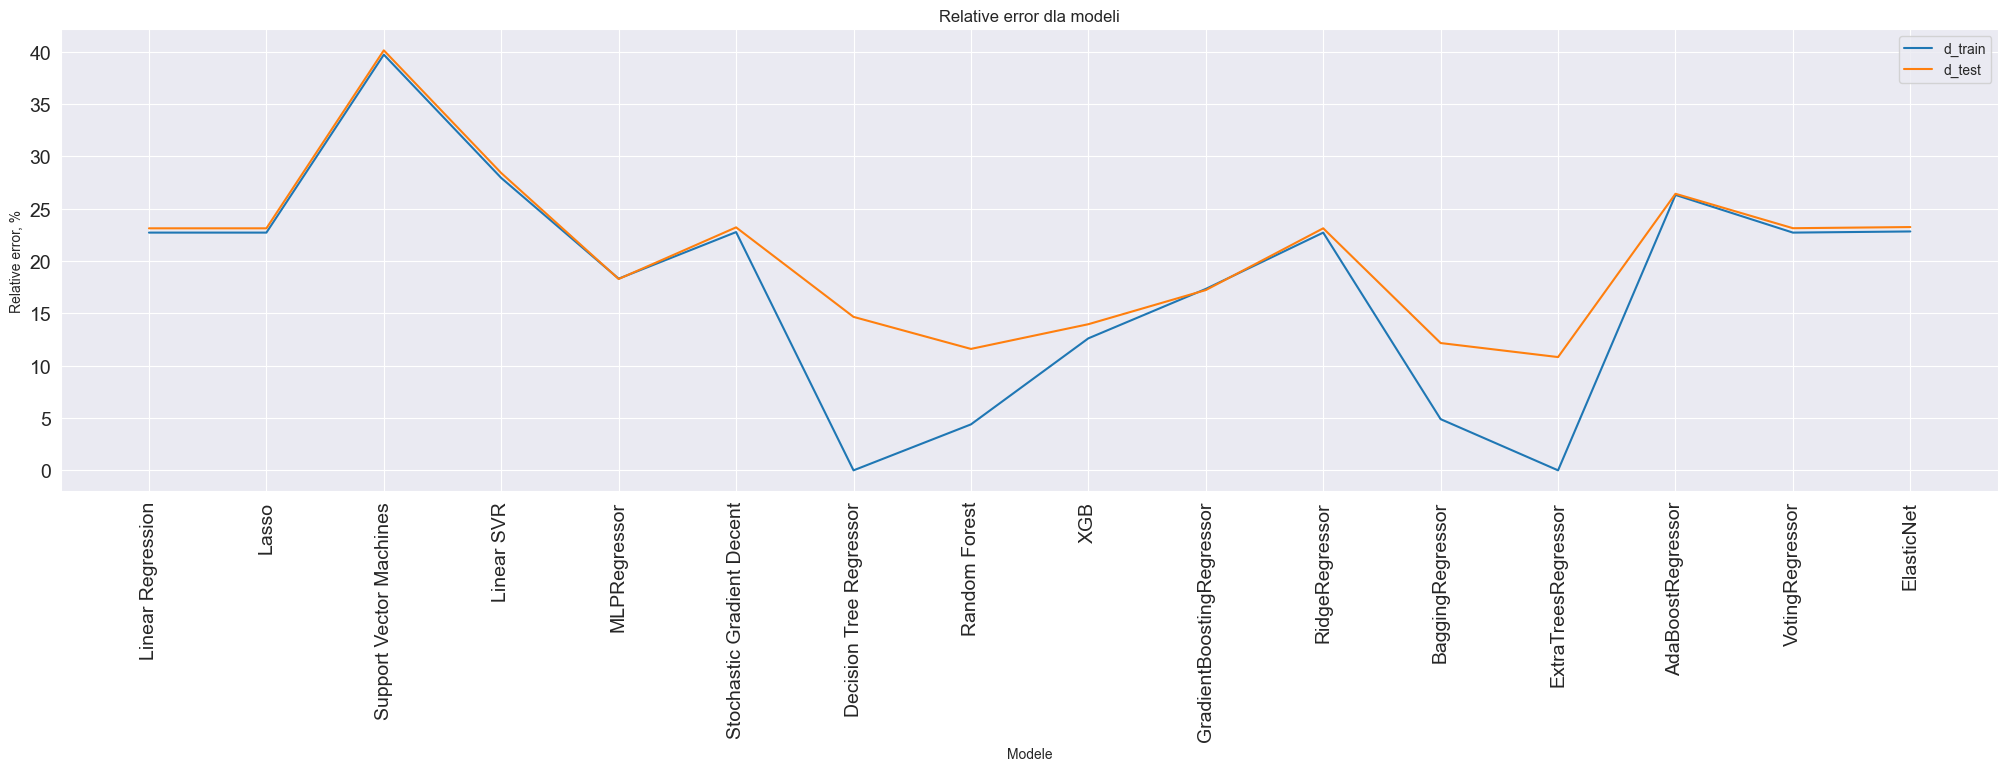

In [58]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative error dla modeli')
plt.xlabel('Modele')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

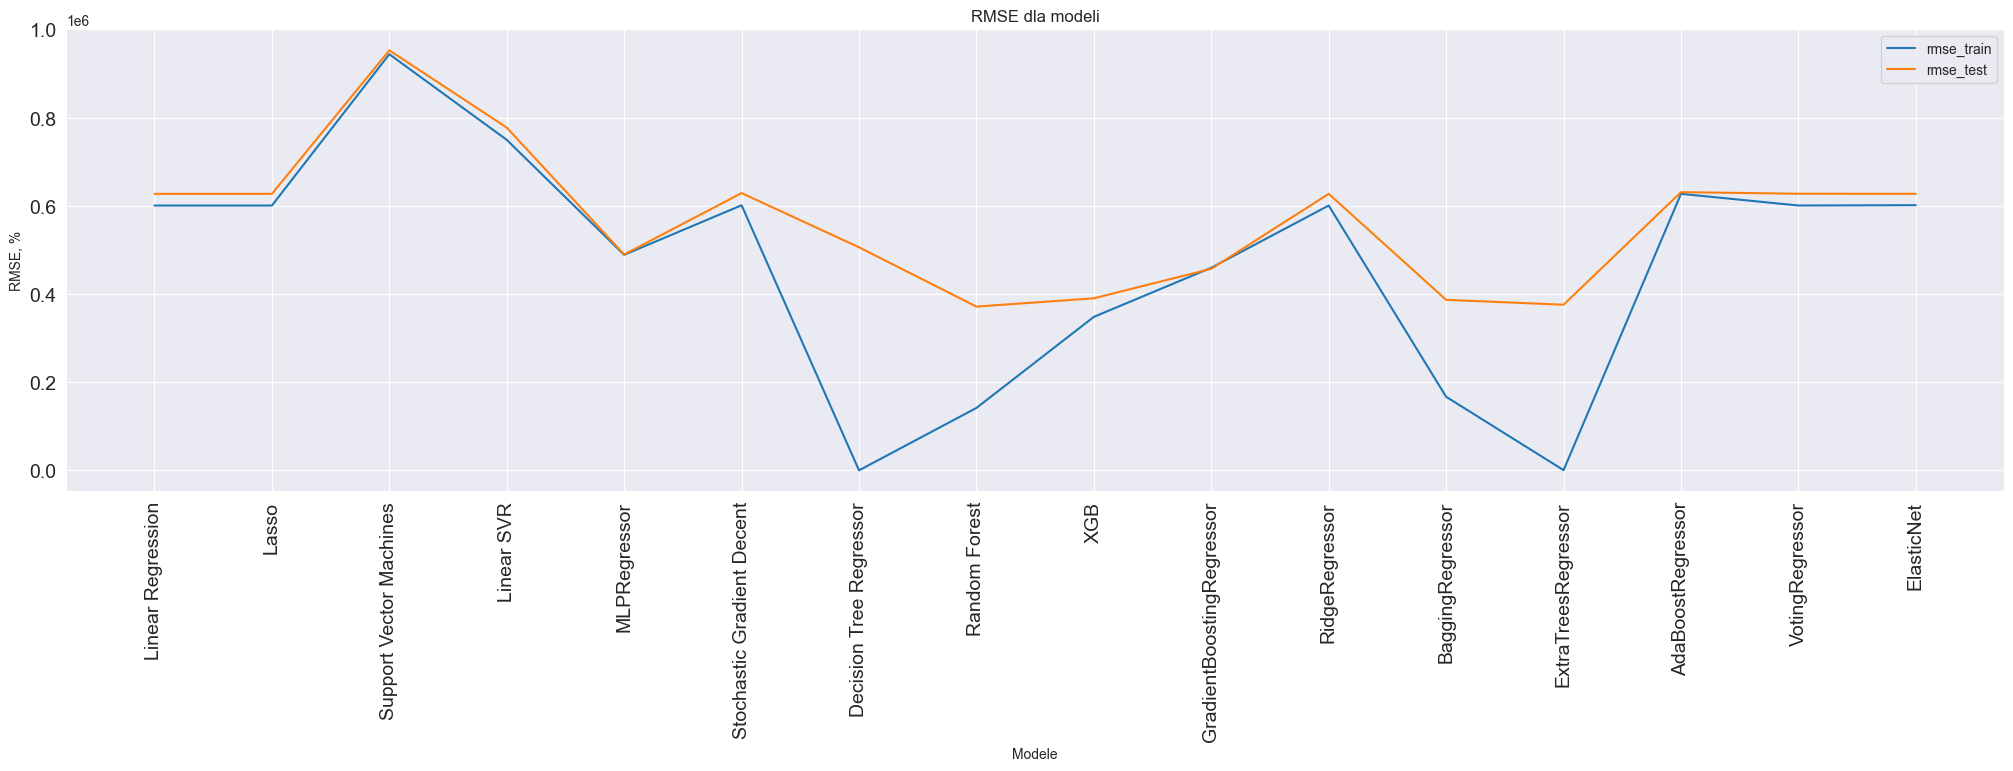

In [59]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE dla modeli')
plt.xlabel('Modele')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()